<a href="https://colab.research.google.com/github/T-Vikas/AI/blob/master/Feb%2006%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
xtrain=xtrain/255.0

In [8]:
#op data preprocessing
ytrain=tf.keras.utils.to_categorical(ytrain)

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["acc"])

In [12]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.6809 - acc: 0.8288 - val_loss: 0.3255 - val_acc: 0.9173
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3545 - acc: 0.9018 - val_loss: 0.2607 - val_acc: 0.9302
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3033 - acc: 0.9142 - val_loss: 0.2339 - val_acc: 0.9367
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2727 - acc: 0.9234 - val_loss: 0.2135 - val_acc: 0.9418
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2503 - acc: 0.9298 - val_loss: 0.1979 - val_acc: 0.9455
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2326 - acc: 0.9346 - val_loss: 0.1835 - val_acc: 0.9505
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2172 - acc: 0.9389 - val_loss: 0.1740 - val_acc: 0.9522
Epoch 8/10
1688/1688 [==============================] - 5s 3ms

In [13]:
#del model

In [14]:
model.history.history

{'loss': [0.6809114813804626,
  0.3545492887496948,
  0.30332571268081665,
  0.27270591259002686,
  0.2502562999725342,
  0.2325638383626938,
  0.21719257533550262,
  0.20395173132419586,
  0.19263136386871338,
  0.18232353031635284],
 'acc': [0.8288333415985107,
  0.9017592668533325,
  0.9141666889190674,
  0.923370361328125,
  0.9297592639923096,
  0.934592604637146,
  0.9388889074325562,
  0.9430184960365295,
  0.9460185170173645,
  0.9490370154380798],
 'val_loss': [0.3255388140678406,
  0.26066482067108154,
  0.23392564058303833,
  0.213485449552536,
  0.1979084014892578,
  0.1834530234336853,
  0.17403851449489594,
  0.1639222651720047,
  0.15408070385456085,
  0.147640198469162],
 'val_acc': [0.9173333048820496,
  0.9301666617393494,
  0.9366666674613953,
  0.9418333172798157,
  0.9455000162124634,
  0.9505000114440918,
  0.9521666765213013,
  0.9546666741371155,
  0.9573333263397217,
  0.9603333473205566]}

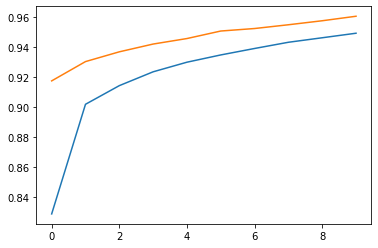

In [15]:
import matplotlib.pyplot as plt
plt.plot(model.history.history.get("acc"))
plt.plot(model.history.history.get("val_acc"))

Text(0.5, 1.0, 'MNIST_loss_epoch10')

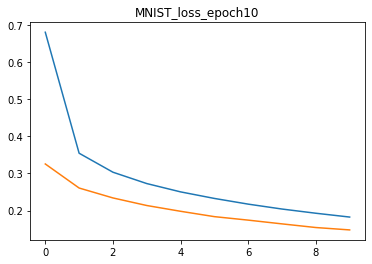

In [16]:
plt.plot(model.history.history.get("loss"))
plt.plot(model.history.history.get("val_loss"))
plt.title("MNIST_loss_epoch10")

In [17]:
#batch size
len(model.get_weights())

4

In [18]:
for i in model.get_weights():
  print(f"{i.shape}")

(784, 100)
(100,)
(100, 10)
(10,)


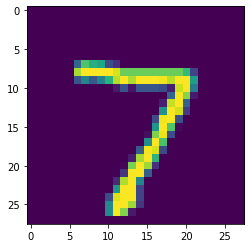

In [19]:
test_image=xtest[0]
plt.imshow(test_image)

In [20]:
test_image=test_image/255.0

In [21]:
model.input_shape

(None, 28, 28)

In [22]:
#none is 32 batc size, height, width
test_image.shape

(28, 28)

In [23]:
test_image1=np.expand_dims(test_image,axis=0)

In [24]:
test_image.shape

(28, 28)

In [25]:
model.predict(test_image1)

1/1 [==============================] - 0s 71ms/step


array([[8.3161649e-05, 9.0129987e-08, 6.1599870e-04, 1.0160520e-03,
        3.9422841e-07, 3.7321057e-05, 4.1691539e-09, 9.9738902e-01,
        1.5550702e-05, 8.4236794e-04]], dtype=float32)

In [26]:
#prob of each number
np.argmax(model.predict(test_image1))

1/1 [==============================] - 0s 16ms/step


7

In [ ]:
#================================================================================================================
#================================================================================================================

In [3]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

2

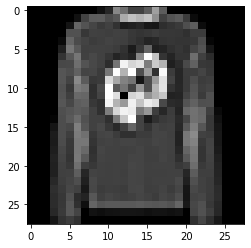

In [5]:
plt.imshow(xtrain[123],cmap='gray')
ytrain[123]

In [6]:
ytrain[123]   #pullover

2

In [7]:
#preprocessing
xtrain=xtrain/255.0
ytrain=tf.keras.utils.to_categorical(ytrain)

In [15]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics="acc")

In [18]:
model_hist=model.fit(xtrain,ytrain,validation_split=0.1,epochs=10,batch_size=128)

Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 1.0442 - acc: 0.6886 - val_loss: 0.7369 - val_acc: 0.7650
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.6793 - acc: 0.7828 - val_loss: 0.6209 - val_acc: 0.7935
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5970 - acc: 0.8076 - val_loss: 0.5661 - val_acc: 0.8125
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5529 - acc: 0.8194 - val_loss: 0.5366 - val_acc: 0.8203
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5243 - acc: 0.8278 - val_loss: 0.5108 - val_acc: 0.8257
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5033 - acc: 0.8323 - val_loss: 0.4931 - val_acc: 0.8312
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4877 - acc: 0.8364 - val_loss: 0.4823 - val_acc: 0.8355
Epoch 8/10
422/422 [==============================] - 1s 3ms/step - loss: 0.

In [14]:
#del model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
!nvidia-smi

Fri Feb  3 10:46:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |   1506MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------